In [105]:
import pandas as pd 
import sqlite3 as sql
from sqlalchemy import create_engine
from sqlalchemy import inspect
from datetime import datetime 
import seaborn as sns

In [106]:
# Import CSV file in Google Colab 
from google.colab import files
uploaded = files.upload()

import io
WQ_Big_Lake_Sammamish_df = pd.read_csv(io.BytesIO(uploaded['Big_Lake_Sammamish.csv']))
WQ_Big_Lake_Sammamish_df.head(5)

Saving Big_Lake_Sammamish.csv to Big_Lake_Sammamish.csv


,Unnamed: 0,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,0,1994-01-06,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1,1994-01-06,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,2,1994-01-06,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,3,1994-01-06,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,4,1994-01-06,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [107]:
# Drop Unnamed column 
WQ_Big_Lake_Sammamish_df.drop('Unnamed: 0',axis=1, inplace=True)
WQ_Big_Lake_Sammamish_df

,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,0.02,103.00,9.15,1.0,0.270,0.011000,7.400,7.4,0.410000,0.017000,94.891147
1,1994-01-06,0.02,104.00,8.98,1.0,0.280,0.012000,7.400,7.3,0.416667,0.019667,98.699450
2,1994-01-06,0.02,102.00,9.00,1.0,0.290,0.012000,7.400,7.3,0.440000,0.019000,101.553997
3,1994-01-06,0.02,105.00,9.21,1.0,0.280,0.012000,7.400,7.3,0.416667,0.019667,98.722325
4,1994-01-06,0.02,104.00,9.20,1.0,0.280,0.012000,7.400,7.3,0.416667,0.019667,98.721299
...,...,...,...,...,...,...,...,...,...,...,...,...
9508,2008-12-09,0.01,103.00,8.00,37.0,0.209,0.008467,7.300,10.4,0.359000,0.017300,73.585895
9509,2008-12-09,0.01,102.00,7.90,37.0,0.209,0.008467,7.300,10.4,0.359000,0.017300,73.575930
9510,2008-12-09,0.01,102.00,7.80,37.0,0.209,0.008467,7.300,10.4,0.359000,0.017300,73.565999
9511,2008-12-09,0.01,102.25,7.90,37.0,0.210,0.008500,7.275,10.4,0.359000,0.017700,73.995892


In [108]:
#Rename Ammmonia_Nitrogen to Ammonia_Nitrogen
WQ_Big_Lake_Sammamish_df.rename({'Ammmonia Nitrogen (mg/L)':'Ammonia Nitrogen (mg/L)'},axis='columns',inplace=True)
WQ_Big_Lake_Sammamish_df.head()

,CollectDate,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1994-01-06,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,1994-01-06,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,1994-01-06,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,1994-01-06,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [109]:
# Data Summary
WQ_Big_Lake_Sammamish_df.describe()

,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
count,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000
mean,0.019529,104.770451,8.794612,3.175549,0.250499,0.004699,7.749050,12.123462,0.450910,0.015715,88.783753
std,0.019682,6.294638,3.179340,8.541212,0.144454,0.004703,0.697979,4.751851,0.148650,0.010067,43.916247
min,0.010000,80.400000,0.000000,0.000000,0.020000,0.002000,6.100000,5.200000,0.050000,0.005000,12.702527
25%,0.010000,102.000000,8.100000,0.000000,0.149333,0.002000,7.200000,8.300000,0.359333,0.009700,58.949820
50%,0.012833,105.000000,9.400000,1.000000,0.246000,0.002650,7.600000,10.800000,0.436833,0.013800,86.358482
75%,0.020333,108.000000,10.713636,3.000000,0.336000,0.006117,8.300000,15.400000,0.528500,0.018733,114.044974
max,0.359000,165.000000,124.400000,180.000000,1.020000,0.129000,9.700000,25.200000,4.900000,0.193000,349.975650


In [110]:
# convert string to datetime
WQ_Big_Lake_Sammamish_df["CollectDate"] = pd.to_datetime(WQ_Big_Lake_Sammamish_df["CollectDate"])

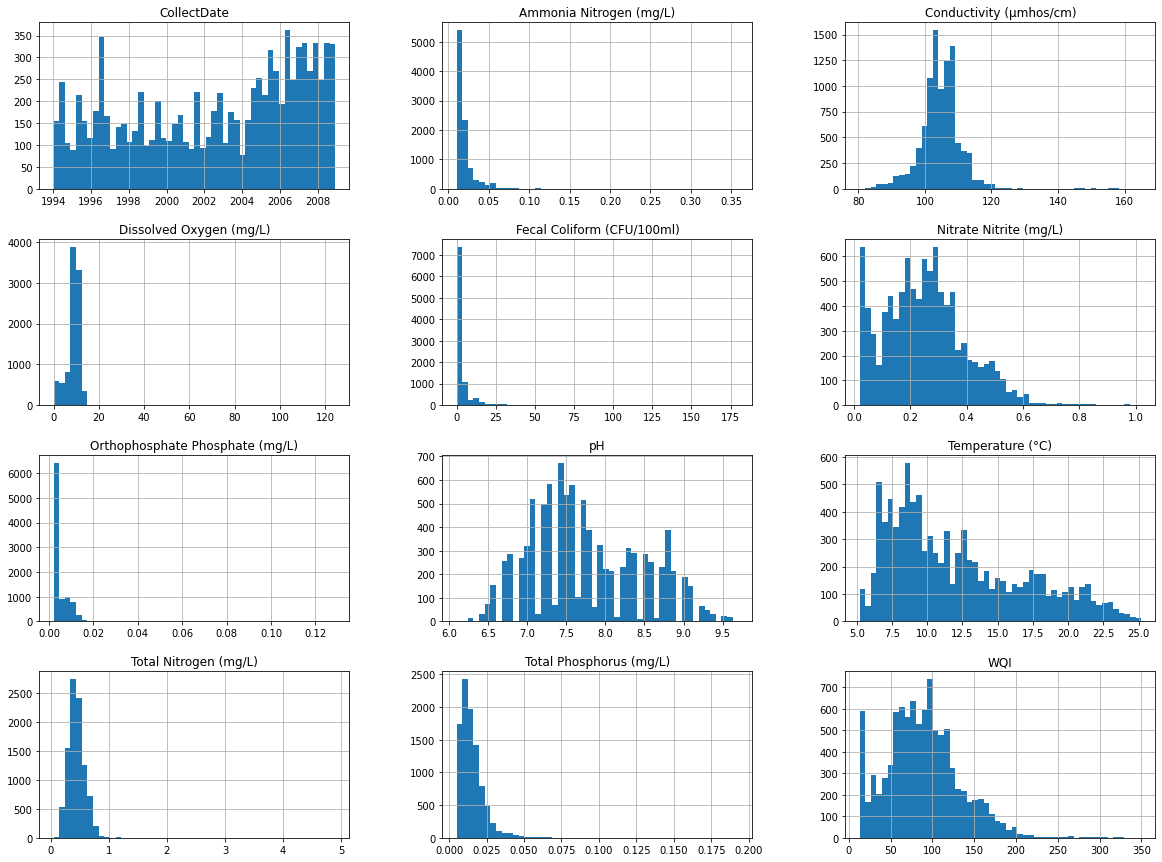

In [111]:
# Histogram shows the number of instances that have a given value range. Using jupyter's magic command to specify which backend Matplotlib should use.
%matplotlib inline
import matplotlib.pyplot as plt
WQ_Big_Lake_Sammamish_df.hist(bins=50, figsize=(20,15))
plt.show()

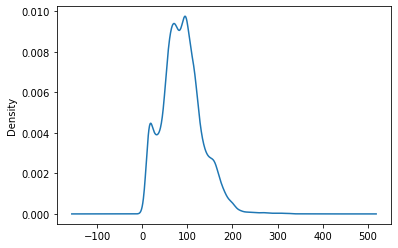

In [112]:
# Visualize the value counts of target variable
WQ_Big_Lake_Sammamish_df["WQI"].plot.density()

In [113]:
# Group by Collect Date 
WQ_Big_Lake_Sammamish_df_mean = WQ_Big_Lake_Sammamish_df.groupby(["CollectDate"]).mean()
WQ_Big_Lake_Sammamish_df_mean.head(5)

,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
CollectDate,,,,,,,,,,,
1994-01-06,0.02,103.961538,9.138846,3.384615,0.292179,0.011353,7.396154,7.283333,0.427628,0.033821,106.640664
1994-02-14,0.02,104.280769,10.704615,6.884615,0.327179,0.009404,7.373077,6.438462,0.782308,0.035462,118.468342
1994-03-08,0.02,104.496154,10.938077,0.653846,0.377115,0.005288,7.523077,7.165385,0.581923,0.015936,127.209743
1994-03-22,0.02,104.957692,11.738462,2.576923,0.351538,0.002359,7.953846,7.373077,0.566026,0.017397,120.007024
1994-04-05,0.02,103.534615,12.773077,3.384615,0.316506,0.004715,8.415385,8.111538,0.514936,0.011218,107.715162


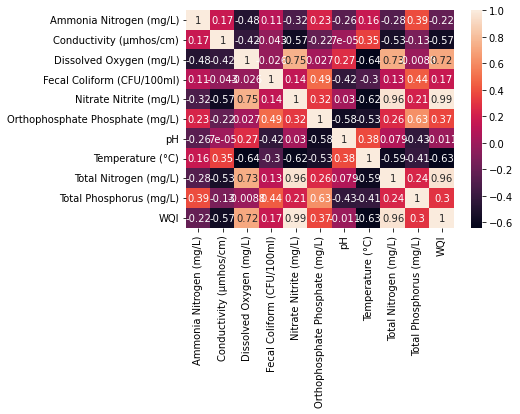

In [114]:
sns.heatmap(WQ_Big_Lake_Sammamish_df_mean.corr(), annot=True)

In [115]:
# correlation among the features of each features in the data frame.
corr_matrix = WQ_Big_Lake_Sammamish_df_mean.corr()
round(corr_matrix,2)

,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
Ammonia Nitrogen (mg/L),1.00,0.17,-0.48,0.11,-0.32,0.23,-0.26,0.16,-0.28,0.39,-0.22
Conductivity (µmhos/cm),0.17,1.00,-0.42,-0.04,-0.57,-0.22,0.00,0.35,-0.53,-0.13,-0.57
Dissolved Oxygen (mg/L),-0.48,-0.42,1.00,-0.03,0.75,0.03,0.27,-0.64,0.73,-0.01,0.72
Fecal Coliform (CFU/100ml),0.11,-0.04,-0.03,1.00,0.14,0.49,-0.42,-0.30,0.13,0.44,0.17
Nitrate Nitrite (mg/L),-0.32,-0.57,0.75,0.14,1.00,0.32,0.03,-0.62,0.96,0.21,0.99
Orthophosphate Phosphate (mg/L),0.23,-0.22,0.03,0.49,0.32,1.00,-0.58,-0.53,0.26,0.63,0.37
pH,-0.26,0.00,0.27,-0.42,0.03,-0.58,1.00,0.38,0.08,-0.43,-0.01
Temperature (°C),0.16,0.35,-0.64,-0.30,-0.62,-0.53,0.38,1.00,-0.59,-0.41,-0.63
Total Nitrogen (mg/L),-0.28,-0.53,0.73,0.13,0.96,0.26,0.08,-0.59,1.00,0.24,0.96
Total Phosphorus (mg/L),0.39,-0.13,-0.01,0.44,0.21,0.63,-0.43,-0.41,0.24,1.00,0.30


In [116]:
# Looking for the correlations between WQI and rest of the features
corr_matrix =WQ_Big_Lake_Sammamish_df_mean.corr()
round(corr_matrix["WQI"],2).sort_values(ascending=False)

WQI                                1.00
Nitrate Nitrite (mg/L)             0.99
Total Nitrogen (mg/L)              0.96
Dissolved Oxygen (mg/L)            0.72
Orthophosphate Phosphate (mg/L)    0.37
Total Phosphorus (mg/L)            0.30
Fecal Coliform (CFU/100ml)         0.17
pH                                -0.01
Ammonia Nitrogen (mg/L)           -0.22
Conductivity (µmhos/cm)           -0.57
Temperature (°C)                  -0.63
Name: WQI, dtype: float64

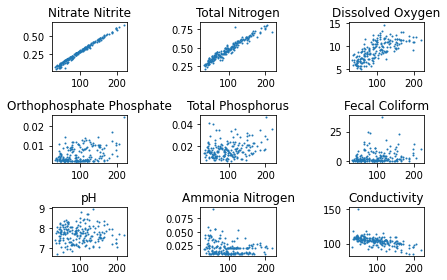

In [117]:
# Scatter plots for each feature with Water Quality Index "WQI
fig,axis=plt.subplots(3,3)
axis[0,0].scatter(WQ_Big_Lake_Sammamish_df_mean["WQI"],WQ_Big_Lake_Sammamish_df_mean["Nitrate Nitrite (mg/L)"], s=1) 
axis[0, 0].set_title('Nitrate Nitrite')
axis[0,1].scatter(WQ_Big_Lake_Sammamish_df_mean["WQI"],WQ_Big_Lake_Sammamish_df_mean["Total Nitrogen (mg/L)"], s=1)
axis[0, 1].set_title('Total Nitrogen')
axis[0,2].scatter(WQ_Big_Lake_Sammamish_df_mean["WQI"],WQ_Big_Lake_Sammamish_df_mean["Dissolved Oxygen (mg/L)"], s=1)
axis[0, 2].set_title('Dissolved Oxygen')
axis[1,0].scatter(WQ_Big_Lake_Sammamish_df_mean["WQI"],WQ_Big_Lake_Sammamish_df_mean["Orthophosphate Phosphate (mg/L)"], s=1)
axis[1,0].set_title('Orthophosphate Phosphate')
axis[1,1].scatter(WQ_Big_Lake_Sammamish_df_mean["WQI"],WQ_Big_Lake_Sammamish_df_mean["Total Phosphorus (mg/L)"], s=1)
axis[1,1].set_title('Total Phosphorus')
axis[1,2].scatter(WQ_Big_Lake_Sammamish_df_mean["WQI"],WQ_Big_Lake_Sammamish_df_mean["Fecal Coliform (CFU/100ml)"], s=1)
axis[1,2].set_title('Fecal Coliform')
axis[2,0].scatter(WQ_Big_Lake_Sammamish_df_mean["WQI"],WQ_Big_Lake_Sammamish_df_mean["pH"], s=1)
axis[2,0].set_title('pH')
axis[2,1].scatter(WQ_Big_Lake_Sammamish_df_mean["WQI"],WQ_Big_Lake_Sammamish_df_mean["Ammonia Nitrogen (mg/L)"], s=1)
axis[2,1].set_title('Ammonia Nitrogen')
axis[2,2].scatter(WQ_Big_Lake_Sammamish_df_mean["WQI"],WQ_Big_Lake_Sammamish_df_mean["Conductivity (µmhos/cm)"], s=1)
axis[2,2].set_title('Conductivity')
plt.tight_layout()
plt.show()

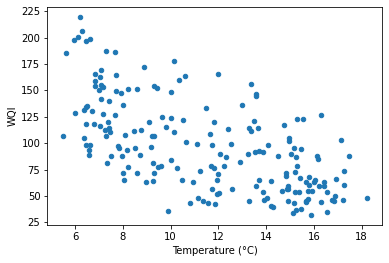

In [118]:
WQ_Big_Lake_Sammamish_df_mean.plot(kind="scatter", x="Temperature (°C)", y="WQI")

In [119]:
WQ_Big_Lake_Sammamish_df.dtypes

CollectDate                        datetime64[ns]
Ammonia Nitrogen (mg/L)                   float64
Conductivity (µmhos/cm)                   float64
Dissolved Oxygen (mg/L)                   float64
Fecal Coliform (CFU/100ml)                float64
Nitrate Nitrite (mg/L)                    float64
Orthophosphate Phosphate (mg/L)           float64
pH                                        float64
Temperature (°C)                          float64
Total Nitrogen (mg/L)                     float64
Total Phosphorus (mg/L)                   float64
WQI                                       float64
dtype: object

In [120]:
WQI_df_1 = WQ_Big_Lake_Sammamish_df.drop(columns=["CollectDate"])
WQI_df_1.head()

,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [121]:
WQI_df_1["WQI"] = round(WQI_df_1["WQI"],2)

In [122]:
#Create the database
conn = sql.connect('King_County_WQI.db')
c = conn.cursor()

In [123]:
#Table of Parameters for King County Big Lakes 
create_sql="CREATE TABLE IF NOT EXISTS Big_Lake_Sammamish (collectdate INTEGER, Ammonia_Nitrogen INTEGER, Conductivity INTEGER, Dissolved_Oxygen INTEGER, Fecal_Coliform INTEGER, Nitrate_Nitrite INTEGER, Orthophosphate_Phosphate INTEGER, pH INTEGER, Temperature INTEGER, Total_Nitrogen INTEGER, Total_Phosphorous INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [124]:
# INSERTING VALUES
#DataFrame all at once 
WQ_Big_Lake_Sammamish_df_mean.to_sql(name="Big_Lake_Sammamish", con=conn, if_exists="replace",index=False)
WQ_Big_Lake_Sammamish_df_mean.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
CollectDate,,,,,,,,,,,
1994-01-06,0.02,103.961538,9.138846,3.384615,0.292179,0.011353,7.396154,7.283333,0.427628,0.033821,106.640664
1994-02-14,0.02,104.280769,10.704615,6.884615,0.327179,0.009404,7.373077,6.438462,0.782308,0.035462,118.468342
1994-03-08,0.02,104.496154,10.938077,0.653846,0.377115,0.005288,7.523077,7.165385,0.581923,0.015936,127.209743
1994-03-22,0.02,104.957692,11.738462,2.576923,0.351538,0.002359,7.953846,7.373077,0.566026,0.017397,120.007024
1994-04-05,0.02,103.534615,12.773077,3.384615,0.316506,0.004715,8.415385,8.111538,0.514936,0.011218,107.715162


In [125]:
#Table of Parameters for CollectDate Vs WQI  
create_sql="CREATE TABLE IF NOT EXISTS CollectDate_Vs_WQI  (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [126]:
# INSERTING VALUES
from tables.table import Column
#Row by row method 
for row in WQ_Big_Lake_Sammamish_df_mean.itertuples():
    insert_sql=f"INSERT INTO CollectDate_Vs_WQI (collectdate,WQI) VALUES('{row[0]}','{row[11]}')"
    cursor.execute(insert_sql) 

In [127]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn as skl
import tensorflow as tf

In [128]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

X = WQI_df_1.drop(["WQI"],1).values
y = WQI_df_1["WQI"].values.reshape(-1,1)


# To check the number of shapes
print(X.shape)
print(y.shape)

# To check the first five entries
print(y[:5])

(9513, 10)
(9513, 1)
[[ 94.89]
 [ 98.7 ]
 [101.55]
 [ 98.72]
 [ 98.72]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [129]:
# Create a StandardScaler instances
scaler_X = skl.preprocessing.StandardScaler()
scaler_y = skl.preprocessing.StandardScaler()

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


# Fit the scaler
scaler_X.fit(X_train)
scaler_y.fit(y_train)

# Scale the data
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# y_train_scaled = scaler_y.transform(y_train)
# y_test_scaled = scaler_y.transform(y_test)
y_train
y_test

print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(7134, 10)
(7134, 1)
(2379, 10)
(2379, 1)


In [130]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 10
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 15

model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


# Second hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="linear"))


# Check the structure of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                330       
                                                                 
 dense_7 (Dense)             (None, 15)                465       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [131]:
# Compiling the model
#model.compile(loss='mean_squared_error', optimizer="adam", metrics=["mse"])
model.compile(loss='mean_squared_error', optimizer="adam")

In [132]:
# Fitting the ANN to the Training set
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
223/223 [==============================] - 1s 3ms/step - loss: 8139.2593 - val_loss: 4557.2275
Epoch 2/100
223/223 [==============================] - 1s 3ms/step - loss: 1682.0201 - val_loss: 633.2657
Epoch 3/100
223/223 [==============================] - 1s 2ms/step - loss: 558.0214 - val_loss: 410.3064
Epoch 4/100
223/223 [==============================] - 1s 2ms/step - loss: 427.4613 - val_loss: 321.1350
Epoch 5/100
223/223 [==============================] - 1s 3ms/step - loss: 342.3299 - val_loss: 256.7003
Epoch 6/100
223/223 [==============================] - 1s 3ms/step - loss: 276.3688 - val_loss: 201.8472
Epoch 7/100
223/223 [==============================] - 1s 2ms/step - loss: 219.6994 - val_loss: 158.6097
Epoch 8/100
223/223 [==============================] - 1s 3ms/step - loss: 174.7888 - val_loss: 126.1122
Epoch 9/100
223/223 [==============================] - 1s 2ms/step - loss: 139.0241 - val_loss: 96.1287
Epoch 10/100
223/223 [==============================]

In [133]:
# Making predictions using the testing data.
y_pred = model.predict(X_test_scaled)
print(y_pred.shape)
print(y_pred)

75/75 [==============================] - 0s 1ms/step
(2379, 1)
[[ 94.94135 ]
 [ 71.134544]
 [ 99.500145]
 ...
 [164.92683 ]
 [ 47.929146]
 [111.016365]]


In [134]:
print(y_test)

[[ 94.93]
 [ 71.04]
 [ 99.44]
 ...
 [164.89]
 [ 47.9 ]
 [111.03]]


In [135]:
y_pred_new = []
for i in y_pred:
    y_pred_new.append(i[0])
    
y_test_new = []
for i in y_test:
    y_test_new.append(i[0])

In [136]:
import pandas as pd

accuracy_df = pd.DataFrame({"Prediction":y_pred_new, "Actual":y_test_new})
accuracy_df.head(20)

,Prediction,Actual
0,94.941353,94.93
1,71.134544,71.04
2,99.500145,99.44
3,212.330948,212.42
4,166.943680,166.89
5,81.452019,81.42
6,183.483734,183.53
7,66.856682,66.86
8,92.070007,92.20
9,99.019432,98.94


In [137]:
#Table for WQI Predictions_Vs_Actual 
create_sql= "CREATE TABLE IF NOT EXISTS Predictions_Vs_Actual ('Prediction' INTEGER, 'Actual' INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [138]:
# INSERTING VALUES
#DataFrame all at once 
accuracy_df.to_sql(name="Predictions_Vs_Actual ", con=conn, if_exists="replace",index=False)
accuracy_df.head(10)

,Prediction,Actual
0,94.941353,94.93
1,71.134544,71.04
2,99.500145,99.44
3,212.330948,212.42
4,166.943680,166.89
5,81.452019,81.42
6,183.483734,183.53
7,66.856682,66.86
8,92.070007,92.20
9,99.019432,98.94


In [139]:
from tables.table import Column
#Row by row method 
for row in accuracy_df.itertuples():
   
    insert_sql=f"INSERT INTO Predictions_Vs_Actual (Prediction,Actual) VALUES('{row[1]}','{row[2]}')"
    cursor.execute(insert_sql) 

In [140]:
# WQI Predictions_Vs_Actual in the Excellent Range 
cursor=c.execute('''
SELECT Prediction,Actual
FROM Predictions_Vs_Actual
WHERE Prediction BETWEEN 91 and 100
ORDER BY Prediction;''')
for row in cursor:
    print(row)

(91.02608489990234, 90.9)
(91.1129379272461, 91.14)
(91.18285369873047, 91.14)
(91.1875991821289, 91.14)
(91.2078857421875, 91.24)
(91.23942565917969, 91.18)
(91.32081604003906, 91.39)
(91.32081604003906, 91.39)
(91.32670593261719, 91.4)
(91.36243438720703, 91.31)
(91.45016479492188, 91.48)
(91.48313903808594, 91.5)
(91.50773620605469, 91.45)
(91.51437377929688, 91.51)
(91.64997863769531, 91.59)
(91.6636962890625, 91.61)
(91.84706115722656, 91.79)
(91.95956420898438, 91.91)
(91.98871612548828, 91.94)
(92.07000732421875, 92.2)
(92.08655548095703, 92.1)
(92.08879852294922, 92.04)
(92.11017608642578, 92.05)
(92.19116973876953, 92.14)
(92.2773666381836, 92.29)
(92.30579376220703, 92.26)
(92.3759536743164, 92.37)
(92.38841247558594, 92.33)
(92.50068664550781, 92.44)
(92.59346771240234, 92.6)
(92.68635559082031, 92.43)
(92.8056869506836, 92.81)
(92.81932830810547, 93.03)
(92.91352081298828, 92.88)
(92.97019958496094, 92.8)
(92.99140167236328, 93.35)
(92.99140167236328, 93.35)
(93.10534667968

In [141]:
# Create DataFrame Predictions_Vs_Actual in the Excellent Range for Lake Sammamish 
Predictions_Vs_Actual_Excellent_Lake_Sammamish_df =pd.read_sql('''
SELECT Prediction,Actual
FROM Predictions_Vs_Actual
WHERE Prediction BETWEEN 91 and 100
ORDER BY Prediction;''',conn)

Predictions_Vs_Actual_Excellent_Lake_Sammamish_df.head(5)

,Prediction,Actual
0,91.026085,90.90
1,91.112938,91.14
2,91.182854,91.14
3,91.187599,91.14
4,91.207886,91.24


In [142]:
#Table of Parameters Predictions_Vs_Actual in the Excellent Range for Lake Sammamish 
create_sql="CREATE TABLE IF NOT EXISTS Predictions_Vs_Actual_Excellent_Lake_Sammamish (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [143]:
# INSERTING VALUES
from tables.table import Column
#Row by row method 
for row in Predictions_Vs_Actual_Excellent_Lake_Sammamish_df.itertuples():
    insert_sql=f"INSERT INTO Predictions_Vs_Actual_Excellent_Lake_Sammamish(collectdate,WQI) VALUES('{row[1]}','{row[2]}')"
    cursor.execute(insert_sql) 

In [144]:
# WQI Predictions_Vs_Actual in the Good Range 
cursor=c.execute('''
SELECT Prediction,Actual
FROM Predictions_Vs_Actual
WHERE Prediction BETWEEN 76 and 90
ORDER BY Prediction;''')
for row in cursor:
    print(row)

(76.0274887084961, 75.99)
(76.04688262939453, 76.03)
(76.05352783203125, 75.87)
(76.08118438720703, 75.95)
(76.08332061767578, 76.1)
(76.09852600097656, 76.05)
(76.3436508178711, 76.31)
(76.36497497558594, 76.29)
(76.38985443115234, 76.4)
(76.46588134765625, 76.43)
(76.59101867675781, 76.44)
(76.6724853515625, 76.52)
(76.71400451660156, 76.73)
(76.72331237792969, 76.59)
(76.88239288330078, 76.94)
(76.97269439697266, 76.94)
(77.07027435302734, 77.08)
(77.18206787109375, 77.3)
(77.2174072265625, 77.33)
(77.31439208984375, 77.32)
(77.46231842041016, 77.28)
(77.48347473144531, 77.36)
(77.71585083007812, 77.75)
(77.7308578491211, 77.75)
(77.75545501708984, 77.73)
(77.76258850097656, 77.71)
(77.88037872314453, 77.87)
(77.89347076416016, 77.86)
(77.9370346069336, 77.92)
(77.96070861816406, 77.73)
(77.98029327392578, 77.91)
(77.98851013183594, 77.79)
(77.99107360839844, 77.97)
(78.04122161865234, 77.82)
(78.07134246826172, 78.04)
(78.07174682617188, 78.1)
(78.07174682617188, 78.1)
(78.07174682

In [145]:
# Create DataFrame Predictions_Vs_Actual in the Good Range for Lake Sammamish 
Predictions_Vs_Actual_Good_Lake_Sammamish_df =pd.read_sql('''
SELECT Prediction,Actual
FROM Predictions_Vs_Actual
WHERE Prediction BETWEEN 76 and 90
ORDER BY Prediction;''',conn)

Predictions_Vs_Actual_Good_Lake_Sammamish_df.head(5)

,Prediction,Actual
0,76.027489,75.99
1,76.046883,76.03
2,76.053528,75.87
3,76.081184,75.95
4,76.083321,76.10


In [146]:
#Table of Parameters Predictions_Vs_Actual in the Good Range for Lake Sammamish 
create_sql="CREATE TABLE IF NOT EXISTS Predictions_Vs_Actual_Good_Lake_Sammamish(collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [147]:
# INSERTING VALUES
from tables.table import Column
#Row by row method 
for row in Predictions_Vs_Actual_Good_Lake_Sammamish_df.itertuples():
    insert_sql=f"INSERT INTO Predictions_Vs_Actual_Good_Lake_Sammamish(collectdate,WQI) VALUES('{row[1]}','{row[2]}')"
    cursor.execute(insert_sql) 

In [148]:
# WQI Predictions_Vs_Actual in the Fair Range 
cursor=c.execute('''
SELECT Prediction,Actual
FROM Predictions_Vs_Actual
WHERE Prediction BETWEEN 51 and 75
ORDER BY Prediction;''')
for row in cursor:
    print(row)

(51.01947021484375, 51.13)
(51.03716278076172, 51.07)
(51.121559143066406, 51.13)
(51.2023811340332, 51.16)
(51.25831985473633, 51.22)
(51.361000061035156, 51.32)
(51.420867919921875, 51.56)
(51.42997360229492, 51.69)
(51.59588623046875, 51.56)
(51.87498474121094, 51.89)
(52.18919372558594, 52.22)
(52.207603454589844, 52.12)
(52.32704162597656, 52.46)
(52.34067916870117, 52.46)
(52.35634231567383, 52.33)
(52.385013580322266, 52.32)
(52.385196685791016, 52.43)
(52.419334411621094, 52.51)
(52.52663803100586, 52.7)
(52.58076095581055, 52.32)
(52.585670471191406, 52.42)
(52.66232681274414, 52.28)
(52.74126434326172, 52.72)
(52.7623405456543, 53.02)
(52.76708984375, 53.04)
(52.79035949707031, 52.74)
(52.835384368896484, 52.71)
(52.85201644897461, 52.94)
(52.88327407836914, 53.21)
(52.90782928466797, 52.8)
(52.9686164855957, 52.93)
(53.002952575683594, 53.01)
(53.00911331176758, 53.01)
(53.0468635559082, 52.99)
(53.08792495727539, 53.11)
(53.13456726074219, 53.11)
(53.139163970947266, 53.08)

In [149]:
# Create DataFrame for WQI in the Predictions_Vs_Actual Fair Range Lake Sammamish 
Predictions_Vs_Actual_Fair_Lake_Sammamish_df =pd.read_sql('''
SELECT Prediction,Actual
FROM Predictions_Vs_Actual
WHERE Prediction BETWEEN 51 and 75
ORDER BY Prediction;''',conn)

Predictions_Vs_Actual_Fair_Lake_Sammamish_df.head(5)

,Prediction,Actual
0,51.019470,51.13
1,51.037163,51.07
2,51.121559,51.13
3,51.202381,51.16
4,51.258320,51.22


In [150]:
#Table of Parameters for WQI in the Predictions_Vs_Actual  Fair Range Lake Sammamish 
create_sql="CREATE TABLE IF NOT EXISTS Predictions_Vs_Actual_Fair_Lake_Sammamish (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [151]:
# INSERTING VALUES
from tables.table import Column
#Row by row method 
for row in Predictions_Vs_Actual_Fair_Lake_Sammamish_df.itertuples():
    insert_sql=f"INSERT INTO Predictions_Vs_Actual_Fair_Lake_Sammamish (collectdate,WQI) VALUES('{row[1]}','{row[2]}')"
    cursor.execute(insert_sql) 

In [152]:
# WQI Predictions_Vs_Actual in the Poor Range 
cursor=c.execute('''
SELECT Prediction,Actual
FROM Predictions_Vs_Actual
WHERE Prediction BETWEEN 26 and 50
ORDER BY Prediction;''')
for row in cursor:
    print(row)

(26.238798141479492, 26.26)
(26.238798141479492, 26.26)
(26.286968231201172, 26.48)
(26.32859992980957, 26.81)
(26.501235961914062, 26.46)
(26.60454750061035, 26.6)
(26.61673355102539, 26.63)
(26.619300842285156, 26.62)
(26.62189292907715, 26.62)
(26.755353927612305, 26.88)
(26.785449981689453, 26.92)
(26.79556655883789, 27)
(26.864002227783203, 27.17)
(26.890504837036133, 26.8)
(27.09062957763672, 27.12)
(27.143630981445312, 27.13)
(27.1635799407959, 27.16)
(27.169700622558594, 27.32)
(27.52297592163086, 27.59)
(27.72260093688965, 27.73)
(27.725772857666016, 27.85)
(27.760452270507812, 27.9)
(27.76524543762207, 27.91)
(28.004545211791992, 28.09)
(28.1020450592041, 28.61)
(28.271684646606445, 28.33)
(28.45804786682129, 28.58)
(28.460189819335938, 28.51)
(28.551816940307617, 28.49)
(28.5861759185791, 28.52)
(28.64423370361328, 28.73)
(28.832523345947266, 28.88)
(28.871042251586914, 28.67)
(29.03618812561035, 28.93)
(29.181785583496094, 29.13)
(29.20502281188965, 29.43)
(29.3755607604980

In [153]:
# Create DataFrame for WQI in the Predictions_Vs_Actual Poor Range Lake Sammamish 
Predictions_Vs_Actual_Poor_Lake_Sammamish_df =pd.read_sql('''
SELECT Prediction,Actual
FROM Predictions_Vs_Actual
WHERE Prediction BETWEEN 26 and 50
ORDER BY Prediction;''',conn)

Predictions_Vs_Actual_Poor_Lake_Sammamish_df.head(5)

,Prediction,Actual
0,26.238798,26.26
1,26.238798,26.26
2,26.286968,26.48
3,26.328600,26.81
4,26.501236,26.46


In [154]:
#Table of Parameters for WQI in the Predictions_Vs_Actual Poor Range Lake Sammamish 
create_sql="CREATE TABLE IF NOT EXISTS Predictions_Vs_Actual_Poor_Lake_Sammamish(collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [155]:
# INSERTING VALUES
from tables.table import Column
#Row by row method 
for row in Predictions_Vs_Actual_Poor_Lake_Sammamish_df.itertuples():
    insert_sql=f"INSERT INTO Predictions_Vs_Actual_Poor_Lake_Sammamish(collectdate,WQI) VALUES('{row[1]}','{row[2]}')"
    cursor.execute(insert_sql) 

In [156]:
# WQI Predictions_Vs_Actual in the Very Poor Range 
cursor=c.execute('''
SELECT Prediction,Actual
FROM Predictions_Vs_Actual
WHERE Prediction BETWEEN 0 and 25
ORDER BY Prediction;''')
for row in cursor:
    print(row)

(12.91655158996582, 12.95)
(13.05447006225586, 13.11)
(13.054852485656738, 13.1)
(13.244322776794434, 13.02)
(13.269168853759766, 13.16)
(13.377408027648926, 13.57)
(13.407509803771973, 13.61)
(13.430087089538574, 13.38)
(13.444219589233398, 13.51)
(13.4745512008667, 13.43)
(13.476371765136719, 13.52)
(13.525864601135254, 13.48)
(13.539839744567871, 13.52)
(13.603818893432617, 13.47)
(13.610239028930664, 13.7)
(13.648041725158691, 13.44)
(13.65091323852539, 13.8)
(13.65573787689209, 13.73)
(13.674980163574219, 13.79)
(13.676336288452148, 13.62)
(13.676981925964355, 13.81)
(13.688274383544922, 13.6)
(13.71867561340332, 13.53)
(13.727836608886719, 13.61)
(13.805585861206055, 13.88)
(13.844600677490234, 13.88)
(13.861783981323242, 14.05)
(13.872152328491211, 14.03)
(13.951693534851074, 13.97)
(13.958948135375977, 14.06)
(13.964351654052734, 14.16)
(13.965478897094727, 13.99)
(13.991501808166504, 13.99)
(14.005918502807617, 13.69)
(14.016162872314453, 14.07)
(14.024845123291016, 14.03)
(14

In [157]:
# WQI Predictions_Vs_Actual in the Very Poor Range 
Predictions_Vs_Actual_Very_Poor_Lake_Sammamish_df=pd.read_sql('''
SELECT Prediction,Actual
FROM Predictions_Vs_Actual
WHERE Prediction BETWEEN 0 and 25
ORDER BY Prediction;''',conn)
Predictions_Vs_Actual_Very_Poor_Lake_Sammamish_df.head(5)

,Prediction,Actual
0,12.916552,12.95
1,13.054470,13.11
2,13.054852,13.10
3,13.244323,13.02
4,13.269169,13.16


In [158]:
#Table of Parameters for WQI in the Very Poor Range Lake Sammamish 
create_sql="CREATE TABLE IF NOT EXISTS Predictions_Vs_Actual_Very_Poor_Lake_Sammamish(collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [159]:
# INSERTING VALUES
from tables.table import Column
#Row by row method 
for row in Predictions_Vs_Actual_Very_Poor_Lake_Sammamish_df.itertuples():
    insert_sql=f"INSERT INTO Predictions_Vs_Actual_Very_Poor_Lake_Sammamish(collectdate,WQI) VALUES('{row[1]}','{row[2]}')"
    cursor.execute(insert_sql) 

In [160]:
# evaluate the model
train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
test_mse = model.evaluate(X_test_scaled,y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.023, Test: 0.059


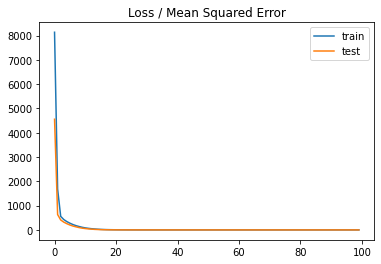

In [161]:
from matplotlib import pyplot
#plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
#pyplot.plot(history.history['mean_squared_error'], label='mse')
pyplot.legend()
pyplot.show()

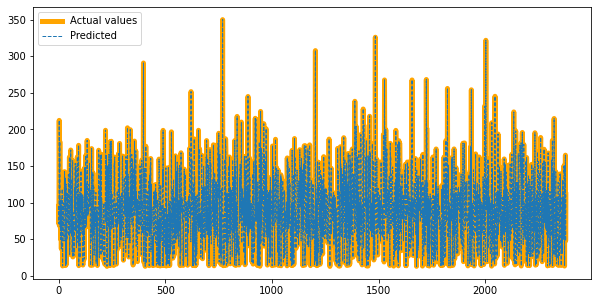

In [162]:
from matplotlib import pyplot
plt.figure(figsize=(10, 5))
plt.title('')
plt.plot(accuracy_df['Actual'], label='Actual values', color='orange', linewidth=5)
plt.plot(accuracy_df['Prediction'], label='Predicted', linewidth=1, linestyle='dashed')
plt.legend()
plt.show()

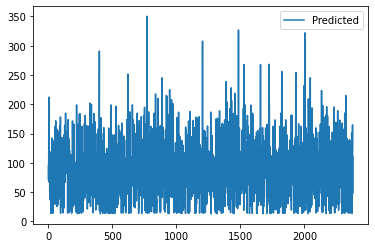

In [163]:
from matplotlib import pyplot
plt.title('')
#plt.plot(accuracy_df['Actual'], label='Actual values')
plt.plot(accuracy_df['Prediction'], label='Predicted')
plt.legend()
plt.show()

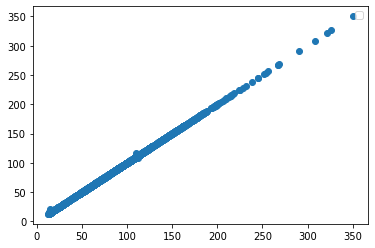

In [164]:
from matplotlib import pyplot
plt.title('')
x=accuracy_df['Actual']
y=accuracy_df['Prediction']
plt.scatter(x,y)

plt.legend()
plt.show()

In [165]:
# Close database connection
conn.commit()
conn.close()